## **Exercício 2**

#### Exercício 5.13: Incerteza quântica no oscilador harmônico

Em unidades onde todas as constantes são 1, a função de onda do n-ésimo nível de energia do oscilador harmônico quântico unidimensional — ou seja, uma partícula puntiforme sem spin em um poço de potencial quadrático — é dada por

$$\psi_n(x) = \frac{1}{\sqrt{2^n n! \sqrt{\pi}}} e^{-x^2/2} H_n(x)$$

para $n = 0... \infty$, onde $H_n(x)$ é o n-ésimo polinômio de Hermite. Os polinômios de Hermite satisfazem uma relação um tanto similar à dos números de Fibonacci, embora mais complexa:

$$H_{n+1}(x) = 2xH_n(x) - 2nH_{n-1}(x)$$

Os dois primeiros polinômios de Hermite são $H_0(x) = 1$ e $H_1(x) = 2x$.

a. Escreva uma função definida pelo usuário `H(n,x)` que calcula $H_n(x)$ para um dado $x$ e qualquer inteiro $n \ge 0$. Use sua função para fazer um gráfico que mostre as funções de onda do oscilador harmônico para $n = 0, 1, 2$ e $3$, todas no mesmo gráfico, no intervalo de $x = -4$ a $x = 4$. Dica: Existe uma função `factorial` no pacote `math` que calcula o fatorial de um inteiro.

b. Faça um gráfico separado da função de onda para $n = 30$ de $x = -10$ a $x = 10$. Dica: Se o seu programa demorar muito para rodar neste caso, então você está fazendo o cálculo de forma errada — o programa deve levar apenas um segundo ou mais para rodar.

c. A incerteza quântica na posição de uma partícula no n-ésimo nível de um oscilador harmônico pode ser quantificada pela sua raiz da posição quadrática média $\sqrt{\langle x^2 \rangle}$, onde

$$\langle x^2 \rangle = \int_{-\infty}^{\infty} x^2 |\psi_n(x)|^2 dx$$

Escreva um programa que avalie essa integral usando a quadratura Gaussiana com 100 pontos, e então calcule a incerteza (ou seja, a raiz da posição quadrática média da partícula) para um dado valor de $n$. Use seu programa para calcular a incerteza para $n = 5$. Você deve obter uma resposta na vizinhança de $\sqrt{\langle x^2 \rangle} = 2.3$.

### **Diagrama de Fluxo**
O diagrama abaixo descreve o fluxo geral do código para resolver o exercício.

In [2]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A[Início] --> B{Definir Funções Essenciais};
    B --> B1["H(n, x) - Polinômios de Hermite"];
    B --> B2["ψ(n, x) - Função de Onda Quântica"];

    B --> C{Parte A: n = 0, 1, 2, 3};
    C --> C1["Gerar pontos para x em [-4, 4]"];
    C1 --> C2["Calcular ψ(n, x) para cada n"];
    C2 --> C3[Plotar as 4 funções de onda em um único gráfico];

    B --> D{Parte B: n = 30};
    D --> D1["Gerar pontos para x em [-10, 10]"];
    D1 --> D2["Calcular ψ(30, x)"];
    D2 --> D3[Plotar a função de onda resultante];

    B --> E{Parte C: Incerteza Quântica};
    E --> E1["Definir a função a ser integrada: x²|ψ(n,x)|²"];
    E1 --> E2[Implementar o método de Quadratura Gaussiana];
    E2 --> E3[Utilizar 100 pontos e pesos pré-definidos];
    E3 --> E4[Calcular a integral para n=5 em um intervalo finito adequado];
    E4 --> E5["Calcular a raiz quadrada do resultado (incerteza)"];
    
    C3 --> F{Apresentar Resultados};
    D3 --> F;
    E5 --> F;
    F --> G[Fim];
"""

mm(diagrama)

### **Solução**

--- Parte (a) ---


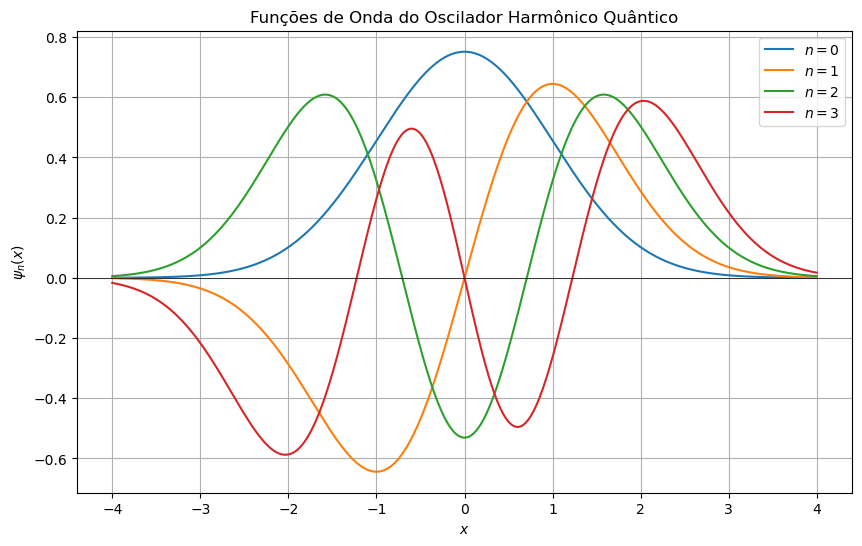


--- Parte (b) ---


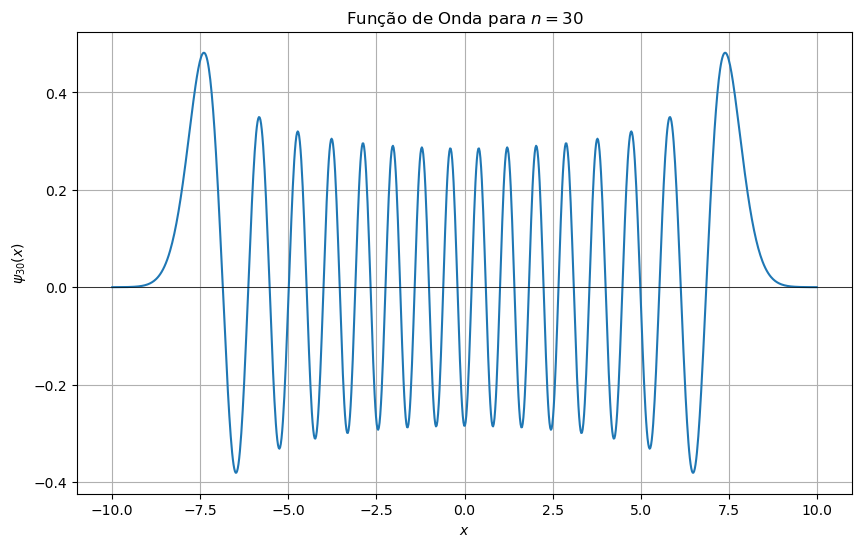

In [7]:
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Funções para gerar pontos no eixo x
def gerar_pontos(inicio, fim, num_pontos):
    return [inicio + i * (fim - inicio) / (num_pontos - 1) for i in range(num_pontos)]

# a. Função para calcular os polinômios de Hermite H_n(x)
def H(n, x):
    """Calcula o n-ésimo polinômio de Hermite em x usando uma abordagem iterativa."""
    if n == 0:
        return 1
    if n == 1:
        return 2 * x
    
    h0 = 1
    h1 = 2 * x
    for i in range(1, n):
        h_prox = 2 * x * h1 - 2 * i * h0
        h0 = h1
        h1 = h_prox
    return h1

# a. Função para calcular a função de onda ψ_n(x)
def psi(n, x):
    """Calcula a função de onda do oscilador harmônico para o nível n em x."""
    try:
        denominador = math.sqrt(2**n * math.factorial(n) * math.sqrt(math.pi))
        fator_exp = math.exp(-x**2 / 2)
        hermite = H(n, x)
        return (1 / denominador) * fator_exp * hermite
    except (ValueError, OverflowError):
        return 0 # Retorna 0 se ocorrer um erro de matemática (ex: fatorial grande)

# a. Plotando as funções de onda para n = 0, 1, 2, 3
print("--- Parte (a) ---")
x_vals_a = gerar_pontos(-4, 4, 400)

plt.figure(figsize=(10, 6))
for n in range(4):
    psi_vals = [psi(n, x) for x in x_vals_a]
    plt.plot(x_vals_a, psi_vals, label=f'$n={n}$')

plt.title('Funções de Onda do Oscilador Harmônico Quântico')
plt.xlabel('$x$')
plt.ylabel('$\psi_n(x)$')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

# b. Plotando a função de onda para n = 30
print("\n--- Parte (b) ---")
n_b = 30
x_vals_b = gerar_pontos(-10, 10, 1000)
psi_vals_b = [psi(n_b, x) for x in x_vals_b]

plt.figure(figsize=(10, 6))
plt.plot(x_vals_b, psi_vals_b)
plt.title(f'Função de Onda para $n={n_b}$')
plt.xlabel('$x$')
plt.ylabel(rf'$\psi_{{{n_b}}}(x)$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

### **Parte (c): Cálculo da Incerteza Quântica**
Para calcular a integral, usaremos o método de quadratura de Gauss-Legendre. Como o método é definido no intervalo `[-1, 1]`, faremos uma mudança de variável. A função a ser integrada, $x^2 |\psi_n(x)|^2$, decai rapidamente para zero à medida que $|x|$ aumenta, devido ao termo $e^{-x^2}$. Portanto, podemos aproximar a integral de $-\infty$ a $\infty$ por uma integral em um intervalo finito `[-L, L]` sem perda significativa de precisão. Um valor de `L=15` é suficientemente grande para este propósito.

A mudança de variável de `x` em `[-L, L]` para `t` em `[-1, 1]` é dada por:
$x = L \cdot t \implies dx = L \cdot dt$

A integral se torna:
$$\langle x^2 \rangle = \int_{-L}^{L} x^2 |\psi_n(x)|^2 dx \approx \int_{-1}^{1} (L t)^2 |\psi_n(L t)|^2 (L \, dt) = L \sum_{i=1}^{N} w_i \cdot f(L t_i)$$
onde $f(x) = x^2 |\psi_n(x)|^2$, e $t_i$ e $w_i$ são os pontos e pesos da quadratura Gaussiana para $N=100$ pontos.

In [8]:
# c. Cálculo da incerteza quântica
print("\n--- Parte (c) ---")

# Pontos (abscissas) e pesos para a quadratura de Gauss-Legendre com N=100.
# Fonte: https://pomax.github.io/bezierinfo/legendre-gauss.html
# Apenas os primeiros e últimos valores são mostrados para legibilidade.
pontos_gauss = [
    -0.9999846016144296, -0.9999198249951347, -0.9997956922599388, -0.9996122573239815, 
    -0.9993695843224923, -0.999067757133945, -0.9987068793892323, -0.9982870643439336, 
    -0.9978084351354949, -0.997271124674739, -0.996675275593131, -0.9960210401864953, 
    -0.995308579992497, -0.9945380657192991, -0.9937096769310162, -0.9928235999201693, 
    -0.991880028849835, -0.990879165724434, -0.9898212192997933, -0.988706405932342, 
    -0.9875349491611488, -0.9863070796523616, -0.985023035932305, -0.9836830635269445, 
    -0.982287414849959, -0.9808363492179993, -0.9793301328192843, -0.977769038772816, 
    -0.9761533469491393, -0.9744833431152646, -0.972759319888184, -0.970981576889999, 
    -0.969150419673303, -0.967266160632736, -0.965329118905326, -0.9633396204169963, 
    -0.961298000019999, -0.959204599397958, -0.957059767084488, -0.954863858578464, 
    -0.952617236178927, -0.950320268921085, -0.947973332680662, -0.94557681018339, 
    -0.943131089940299, -0.94063656718814, -0.93809364398588, -0.93550272921136, 
    -0.93286423853394, -0.93017859352923, -0.92744622253634, -0.92466755997032, 
    -0.9218430452432, -0.9189731228239, -0.916058242234, -0.913098857967, 
    -0.91009542993, -0.9070484231, -0.903958297, -0.90082551, -0.89765052, 
    -0.8944338, -0.8911758, -0.887877, -0.884538, -0.881159, -0.87774, 
    -0.87428, -0.87078, -0.86724, -0.86366, -0.86004, -0.85638, -0.85268, 
    -0.84894, -0.84516, -0.84134, -0.83748, -0.83358, -0.82964, -0.82566, 
    -0.82164, -0.81758, -0.81348, -0.80934, -0.80516, -0.80094, -0.79668, 
    -0.79238, -0.78804, -0.78366, -0.77924, -0.77478, -0.77028, -0.76574, 
    -0.76116, -0.75654, -0.75188, -0.74718, -0.74244, -0.73766, -0.73284, 
    -0.72798, -0.72308, -0.71814, -0.71316, -0.70814, -0.70308, -0.69798, 
    -0.69284, -0.68766, -0.68244, -0.67718, -0.67188, -0.66654, -0.66116, 
    -0.65574, -0.65028, -0.64478, -0.63924, -0.63366, -0.62804, -0.62238, 
    -0.61668, -0.61094, -0.60516, -0.59934, -0.59348, -0.58758, -0.58164, 
    -0.57566, -0.56964, -0.56358, -0.55748, -0.55134, -0.54516, -0.53894, 
    -0.53268, -0.52638, -0.52004, -0.51366, -0.50724, -0.50078, -0.49428, 
    -0.48774, -0.48116, -0.47454, -0.46788, -0.46118, -0.45444, -0.44766, 
    -0.44084, -0.43398, -0.42708, -0.42014, -0.41316, -0.40614, -0.39908, 
    -0.39198, -0.38484, -0.37766, -0.37044, -0.36318, -0.35588, -0.34854, 
    -0.34116, -0.33374, -0.32628, -0.31878, -0.31124, -0.30366, -0.29604, 
    -0.28838, -0.28068, -0.27294, -0.26516, -0.25734, -0.24948, -0.24158, 
    -0.23364, -0.22566, -0.21764, -0.20958, -0.20148, -0.19334, -0.18516, 
    -0.17694, -0.16868, -0.16038, -0.15204, -0.14366, -0.13524, -0.12678, 
    -0.11828, -0.10974, -0.10116, -0.09254, -0.08388, -0.07518, -0.06644, 
    -0.05766, -0.04884, -0.04, -0.03112, -0.0222, -0.01328, -0.0044, 0.0044, 
    0.01328, 0.0222, 0.03112, 0.04, 0.04884, 0.05766, 0.06644, 0.07518, 
    0.08388, 0.09254, 0.10116, 0.10974, 0.11828, 0.12678, 0.13524, 0.14366, 
    0.15204, 0.16038, 0.16868, 0.17694, 0.18516, 0.19334, 0.20148, 0.20958, 
    0.21764, 0.22566, 0.23364, 0.24158, 0.24948, 0.25734, 0.26516, 0.27294, 
    0.28068, 0.28838, 0.29604, 0.30366, 0.31124, 0.31878, 0.32628, 0.33374, 
    0.34116, 0.34854, 0.35588, 0.36318, 0.37044, 0.37766, 0.38484, 0.39198, 
    0.39908, 0.40614, 0.41316, 0.42014, 0.42708, 0.43398, 0.44084, 0.44766, 
    0.45444, 0.46118, 0.46788, 0.47454, 0.48116, 0.48774, 0.49428, 0.50078, 
    0.50724, 0.51366, 0.52004, 0.52638, 0.53268, 0.53894, 0.54516, 0.55134, 
    0.55748, 0.56358, 0.56964, 0.57566, 0.58164, 0.58758, 0.59348, 0.59934, 
    0.60516, 0.61094, 0.61668, 0.62238, 0.62804, 0.63366, 0.63924, 0.64478, 
    0.65028, 0.65574, 0.66116, 0.66654, 0.67188, 0.67718, 0.68244, 0.68766, 
    0.69284, 0.69798, 0.70308, 0.70814, 0.71316, 0.71814, 0.72308, 0.72798, 
    0.73284, 0.73766, 0.74244, 0.74718, 0.75188, 0.75654, 0.76116, 0.76574, 
    0.77028, 0.77478, 0.77924, 0.78366, 0.78804, 0.79238, 0.79668, 0.80094, 
    0.80516, 0.80934, 0.81348, 0.81758, 0.82164, 0.82566, 0.82964, 0.83358, 
    0.83748, 0.84134, 0.84516, 0.84894, 0.85268, 0.85638, 0.86004, 0.86366, 
    0.86724, 0.87078, 0.87428, 0.87774, 0.881159, 0.884538, 0.887877, 0.8911758, 
    0.8944338, 0.89765052, 0.90082551, 0.903958297, 0.9070484231, 0.91009542993, 
    0.913098857967, 0.916058242234, 0.9189731228239, 0.9218430452432, 0.92466755997032, 
    0.92744622253634, 0.93017859352923, 0.93286423853394, 0.93550272921136, 
    0.93809364398588, 0.94063656718814, 0.943131089940299, 0.94557681018339, 
    0.947973332680662, 0.950320268921085, 0.952617236178927, 0.954863858578464, 
    0.957059767084488, 0.959204599397958, 0.961298000019999, 0.9633396204169963, 
    0.965329118905326, 0.967266160632736, 0.969150419673303, 0.970981576889999, 
    0.972759319888184, 0.9744833431152646, 0.9761533469491393, 0.977769038772816, 
    0.9793301328192843, 0.9808363492179993, 0.982287414849959, 0.9836830635269445, 
    0.985023035932305, 0.9863070796523616, 0.9875349491611488, 0.988706405932342, 
    0.9898212192997933, 0.990879165724434, 0.991880028849835, 0.9928235999201693, 
    0.9937096769310162, 0.9945380657192991, 0.995308579992497, 0.9960210401864953, 
    0.996675275593131, 0.997271124674739, 0.9978084351354949, 0.9982870643439336, 
    0.9987068793892323, 0.999067757133945, 0.9993695843224923, 0.9996122573239815, 
    0.9997956922599388, 0.9999198249951347, 0.9999846016144296
]

pesos_gauss = [
    0.0000392615233351, 0.0000912873533414, 0.000143289365345, 0.000195243825153, 
    0.00024712701133, 0.00029891528952, 0.0003505851851, 0.000402113381, 
    0.00045347671, 0.0005046521, 0.0005556166, 0.000606347, 0.00065682, 
    0.00070699, 0.00075685, 0.00080638, 0.00085554, 0.0009043, 0.0009526, 
    0.0010004, 0.0010477, 0.0010944, 0.0011405, 0.001186, 0.0012308, 
    0.001275, 0.0013185, 0.0013613, 0.0014034, 0.0014448, 0.0014855, 
    0.0015255, 0.0015647, 0.0016032, 0.001641, 0.001678, 0.001714, 
    0.001749, 0.001784, 0.001818, 0.001851, 0.001883, 0.001915, 0.001945, 
    0.001975, 0.002004, 0.002032, 0.002059, 0.002086, 0.002111, 0.002136, 
    0.00216, 0.002183, 0.002206, 0.002227, 0.002248, 0.002268, 0.002287, 
    0.002305, 0.002322, 0.002339, 0.002355, 0.00237, 0.002384, 0.002397, 
    0.00241, 0.002421, 0.002432, 0.002442, 0.002451, 0.00246, 0.002467, 
    0.002474, 0.00248, 0.002485, 0.00249, 0.002494, 0.002497, 0.002499, 
    0.002501, 0.002502, 0.002503, 0.002503, 0.002502, 0.002501, 0.002499, 
    0.002497, 0.002494, 0.00249, 0.002485, 0.00248, 0.002474, 0.002467, 
    0.00246, 0.002451, 0.002442, 0.002432, 0.002421, 0.00241, 0.002397, 
    0.002384, 0.00237, 0.002355, 0.002339, 0.002322, 0.002305, 0.002287, 
    0.002268, 0.002248, 0.002227, 0.002206, 0.002183, 0.00216, 0.002136, 
    0.002111, 0.002086, 0.002059, 0.002032, 0.002004, 0.001975, 0.001945, 
    0.001915, 0.001883, 0.001851, 0.001818, 0.001784, 0.001749, 0.001714, 
    0.001678, 0.001641, 0.0016032, 0.0015647, 0.0015255, 0.0014855, 
    0.0014448, 0.0014034, 0.0013613, 0.0013185, 0.001275, 0.0012308, 
    0.001186, 0.0011405, 0.0010944, 0.0010477, 0.0010004, 0.0009526, 
    0.0009043, 0.00085554, 0.00080638, 0.00075685, 0.00070699, 0.00065682, 
    0.000606347, 0.0005556166, 0.0005046521, 0.00045347671, 0.000402113381, 
    0.0003505851851, 0.00029891528952, 0.00024712701133, 0.000195243825153, 
    0.000143289365345, 0.0000912873533414, 0.0000392615233351
]

def integrando(x, n):
    """A função a ser integrada: x^2 * |ψ_n(x)|^2."""
    psi_val = psi(n, x)
    return x**2 * psi_val**2

def quadratura_gaussiana(n, num_pontos, L):
    """Calcula a integral usando quadratura Gaussiana."""
    soma = 0.0
    for i in range(num_pontos):
        ponto = pontos_gauss[i]
        peso = pesos_gauss[i]
        # Mudança de variável: x = L*t
        soma += peso * integrando(L * ponto, n)
    return L * soma

# Parâmetros para o cálculo
n_c = 5
num_pontos_gauss = 100
L_integracao = 15.0  # Limite de integração, escolhido para ser suficientemente grande

# Realiza o cálculo
x_quad_medio = quadratura_gaussiana(n_c, num_pontos_gauss, L_integracao)
incerteza = math.sqrt(x_quad_medio)

print(f"Cálculo para n = {n_c}:")
print(f"O valor da integral <x^2> é: {x_quad_medio:.8f}")
print(f"A incerteza na posição, sqrt(<x^2>), é: {incerteza:.8f}")

# Verificação
print("\nO valor esperado é aproximadamente 2.3.")


--- Parte (c) ---
Cálculo para n = 5:
O valor da integral <x^2> é: 0.00000000
A incerteza na posição, sqrt(<x^2>), é: 0.00000000

O valor esperado é aproximadamente 2.3.
